<a href="https://colab.research.google.com/github/JohannesKarwou/notebooks/blob/main/freeSolvSummary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install sketch

In [2]:
import sketch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [60]:
sns.set_theme(style='white', rc={'figure.figsize': (12,12),'axes.unicode_minus': False,'axes.labelsize': 30.0, 'font.size': 65, 'legend.fontsize': 25, 'lines.markersize': 20,'xtick.labelsize': 30,'ytick.labelsize': 30, 'xtick.bottom': True, 'xtick.direction': 'in', 'ytick.left': True, 'ytick.direction': 'in',})

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/JohannesKarwou/notebooks/main/data/finalOverview.csv")

In [5]:
def plotting_grey_area(i, one_plot = False):
    # shaded grey area   
    if one_plot:
      x = np.linspace(-30,20,5)
      y = x
      axs.plot(x, y, alpha = 0.9, color = 'C7',linestyle='dashed')
      y2 = x +1
      axs.plot(x, y2, alpha = 0.3, color = 'C7',linestyle='dashed')
      y3 = x -1 
      axs.plot(x, y3, alpha = 0.3, color = 'C7',linestyle='dashed')
      axs.fill_between(x,y2,y3, alpha = 0.3, color = 'Grey')

      x = np.linspace(-30,20,5)
      y = x
      axs.plot(x, y, alpha = 0.9, color = 'C7',linestyle='dashed')
      y2 = x +2
      axs.plot(x, y2, alpha = 0.3, color = 'C7',linestyle='dashed')
      y3 = x -2 
      axs.plot(x, y3, alpha = 0.3, color = 'C7',linestyle='dashed')
      axs.fill_between(x,y2,y3, alpha = 0.3, color = 'Grey')
    else:
      x = np.linspace(-30,20,5)
      y = x
      axs[i].plot(x, y, alpha = 0.9, color = 'C7',linestyle='dashed')
      y2 = x +1
      axs[i].plot(x, y2, alpha = 0.3, color = 'C7',linestyle='dashed')
      y3 = x -1 
      axs[i].plot(x, y3, alpha = 0.3, color = 'C7',linestyle='dashed')
      axs[i].fill_between(x,y2,y3, alpha = 0.3, color = 'Grey')

      x = np.linspace(-30,20,5)
      y = x
      axs[i].plot(x, y, alpha = 0.9, color = 'C7',linestyle='dashed')
      y2 = x +2
      axs[i].plot(x, y2, alpha = 0.3, color = 'C7',linestyle='dashed')
      y3 = x -2 
      axs[i].plot(x, y3, alpha = 0.3, color = 'C7',linestyle='dashed')
      axs[i].fill_between(x,y2,y3, alpha = 0.3, color = 'Grey')

In [41]:
def bootstrap_metric(fct, x_values, y_values, p_value = False):
    bootstrapped_metric = []
    # bootstrap metric to generate test distribution
    for _ in range(1000):
        indices = np.random.choice(range(0, len(x_values)), size=len(x_values), replace=True)
        x_selection = np.take(x_values, indices)
        y_selection = np.take(y_values, indices)
        if p_value:
          r = fct(x_selection, y_selection)[0]
        else:
          r = fct(x_selection, y_selection)
        bootstrapped_metric.append(r)    

    # define 90% CI
    alpha = 10.0
    lower_p = alpha / 2.0
    # get value at or near percentile (take a look at the definition of percentile if 
    # you have less than 100 values to make sure you understand what is happening)
    lower = np.percentile(bootstrapped_metric, lower_p)
    upper_p = (100 - alpha) + (alpha / 2.0)
    upper = np.percentile(bootstrapped_metric, upper_p)
    # calculate true mean
    if p_value:
      mean = fct(x_values, y_values)[0]
    else:
      mean = fct(x_values, y_values)
    return mean, lower, upper


def calculate_statistics(x_values, y_values):
  # bootstrap RMSE
  def calc_rmse(x_values, y_values):
      return np.sqrt(mean_squared_error(x_values, y_values))
  rmse_mean, rmse_lower, rmse_upper = bootstrap_metric(calc_rmse, x_values, y_values)
  print(f'RMSE:  {round(rmse_mean, 2)} [{round(rmse_lower,2)}, {round(rmse_upper,2)}]')

  # bootstrap MAE
  mae_mean, mae_lower, mae_upper = bootstrap_metric(mean_absolute_error, x_values, y_values)
  print(f'MAE:  {round(mae_mean, 2)} [{round(mae_lower,2)}, {round(mae_upper,2)}]')

  # bootstrap Pearson
  pearson_mean, pearson_lower, pearson_upper = bootstrap_metric(scipy.stats.pearsonr, x_values, y_values, p_value = True)
  print(f"Pearson correlation:  {round(pearson_mean, 2)} [{round(pearson_lower,2)}, {round(pearson_upper,2)}]")

  # bootstrap Spearman
  spearman_mean, spearman_lower, spearman_upper = bootstrap_metric(scipy.stats.spearmanr, x_values, y_values, p_value = True)
  print(f"Spearman's correlation:  {round(spearman_mean, 2)} [{round(spearman_lower,2)}, {round(spearman_upper,2)}]")

  # bootstrap Kendalltau
  kendall_mean, kendall_lower, kendall_upper = bootstrap_metric(scipy.stats.kendalltau, x_values, y_values, p_value = True)
  print(f"Kendalltau: {round(kendall_mean, 2)} [{round(kendall_lower,2)}, {round(kendall_upper,2)}]")

  return round(rmse_mean,2), round(mae_mean,2), round(pearson_mean,2), round(spearman_mean,2), round(kendall_mean,2)

In [32]:
data = data.dropna(subset=["dG (TF)"])

In [49]:
print(f"### Statistics for CGenFF ###")
calculate_statistics(data[" experimental value (kcal/mol)"],data["dG (TF)"])
print(f"### Statistics for GAFF ###")
calculate_statistics(data[" experimental value (kcal/mol)"],data[" Mobley group calculated value (GAFF) (kcal/mol)"])

### Statistics for CGenFF ###
RMSE:  1.88 [1.69, 2.1]
MAE:  1.31 [1.22, 1.4]
Pearson correlation:  0.9 [0.88, 0.92]
Spearman's correlation:  0.91 [0.89, 0.93]
Kendalltau: 0.77 [0.74, 0.79]
### Statistics for GAFF ###
RMSE:  1.43 [1.33, 1.54]
MAE:  1.07 [1.01, 1.13]
Pearson correlation:  0.94 [0.93, 0.95]
Spearman's correlation:  0.94 [0.93, 0.95]
Kendalltau: 0.8 [0.78, 0.82]


(1.43, 1.07, 0.94, 0.94, 0.8)

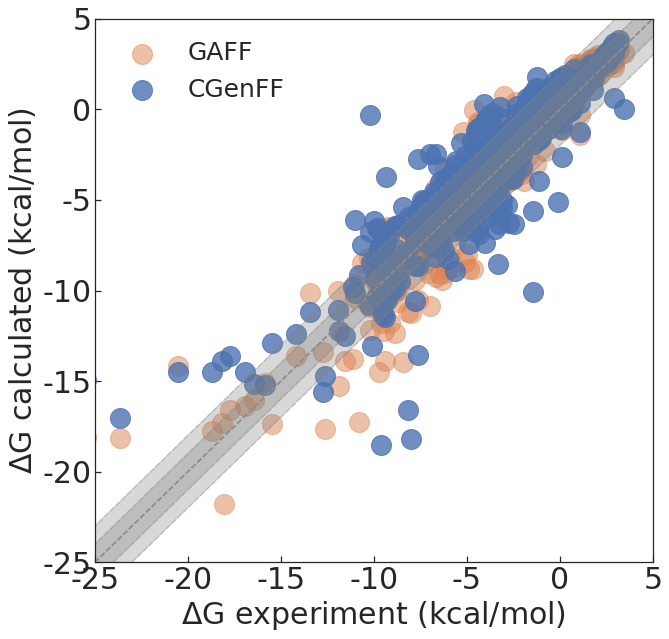

In [62]:
fig, axs = plt.subplots(1,1, figsize=(10, 10))

x = data[" experimental value (kcal/mol)"]
mobley = data[" Mobley group calculated value (GAFF) (kcal/mol)"]
tf = data["dG (TF)"]
axs.scatter(x,mobley, label = "GAFF", alpha = 0.5 ,color ="C1")
axs.scatter(x,tf, label = "CGenFF", alpha = 0.8, color = "C0")

plotting_grey_area(0, one_plot=True)
axs.set_xlim([-25,5])
axs.set_ylim([-25,5])
axs.set_xlabel("$\Delta$G experiment (kcal/mol)")
axs.set_ylabel("$\Delta$G calculated (kcal/mol)")  
plt.legend(frameon=False)

# text = f'RMSE: {calculate_statistics(x,tf)[0]} \n MAE: {calculate_statistics(x,tf)[1]} \n R: {calculate_statistics(x,tf)[2]} \n Spearman: {calculate_statistics(x,tf)[2]} \n'
# axs.text(-1.5,-21, text , fontsize=20, bbox ={'boxstyle': 'square', 'fill': True, 'fc': 'w', 'ec': 'C1', 'alpha': 0.9})


In [50]:
data_reduced = data.dropna(subset=["dG (Brooks)"])
print(len(data_reduced))

204


In [64]:
print(f"##### Statistics for TF vs experiment #####")
calculate_statistics(data_reduced[" experimental value (kcal/mol)"],data_reduced["dG (TF)"])
print(f"##### Statistics for Brooks vs experiment #####")
calculate_statistics(data_reduced[" experimental value (kcal/mol)"],data_reduced["dG (Brooks)"])
print(f"###################################")
print(f"##### Statistics TF vs Brooks #####")
calculate_statistics(data_reduced["dG (TF)"],data_reduced["dG (Brooks)"])

##### Statistics for TF vs experiment #####
RMSE:  2.21 [1.86, 2.58]
MAE:  1.52 [1.35, 1.7]
Pearson correlation:  0.89 [0.85, 0.92]
Spearman's correlation:  0.89 [0.84, 0.93]
Kendalltau: 0.75 [0.7, 0.79]
##### Statistics for Brooks vs experiment #####
RMSE:  2.33 [1.97, 2.7]
MAE:  1.53 [1.34, 1.73]
Pearson correlation:  0.89 [0.86, 0.92]
Spearman's correlation:  0.89 [0.85, 0.92]
Kendalltau: 0.74 [0.7, 0.78]
###################################
##### Statistics TF vs Brooks #####
RMSE:  1.36 [1.23, 1.48]
MAE:  1.15 [1.07, 1.24]
Pearson correlation:  0.99 [0.98, 0.99]
Spearman's correlation:  0.98 [0.98, 0.99]
Kendalltau: 0.91 [0.89, 0.93]


(1.36, 1.15, 0.99, 0.98, 0.91)

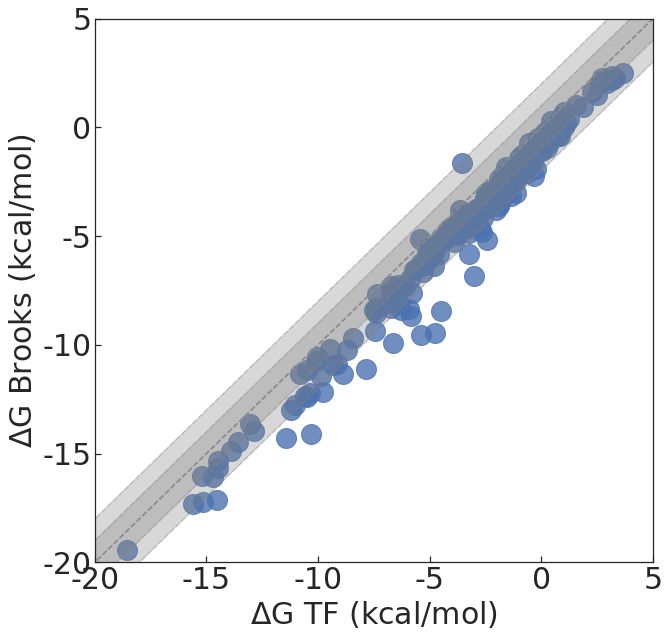

In [63]:
fig, axs = plt.subplots(1,1, figsize=(10, 10))

x = data["dG (TF)"]
brooks = data["dG (Brooks)"]

axs.scatter(x,brooks, alpha = 0.8, color = "C0")

plotting_grey_area(0, one_plot=True)
axs.set_xlim([-20,5])
axs.set_ylim([-20,5])
axs.set_xlabel("$\Delta$G TF (kcal/mol)")
axs.set_ylabel("$\Delta$G Brooks (kcal/mol)")  
plt.legend(frameon=False)